In [1]:
import sys
sys.path.append('..')

from scripts import graph_osm_loader, utils, clustering
from scripts.filtration import FiltrationClustering

# from scripts.graph_filtration.utils import plot_simplex
from scripts.graph_filtration.clustering import build_knn_graph

import matplotlib.pyplot as plt
import imageio.v3 as iio
from IPython.display import Image

import igraph as ig
import networkx as nx
import numpy as np

from tqdm.notebook import tqdm

from random import randint
from joblib import Parallel, delayed

In [2]:
# def cluster_sum(G_cluster, weight='length'):
#     total_dist = 0.0
#     center = nx.barycenter(G_cluster, weight=weight)
#     d = nx.multi_source_dijkstra_path_length(G_cluster, center)
#     return np.sum(list(d.values()))

# def optimal_clustering(G, clusters_set, weight='length'):
#     min_dist = np.inf
#     min_id = -1

#     debug = []
#     for i, clusters in enumerate(clusters_set):
#         total_dist = 0.0
#         for cluster in clusters:
#             G_cluster = G.subgraph(cluster)
#             total_dist += cluster_sum(G_cluster, weight) / len(cluster)
#             # if total_dist > min_dist:
#             #     break 
#         debug.append(total_dist)
#         if total_dist < min_dist:
#             min_dist = total_dist
#             min_id = i
#     return min_id, debug

Medium size cities:
- `R1853866` - 5k
- `KRG` - 3k
- `ASHA` - 715
- `R3305920` - 1k

# ASHA

Text(0.5, 1.0, '723 nodes')

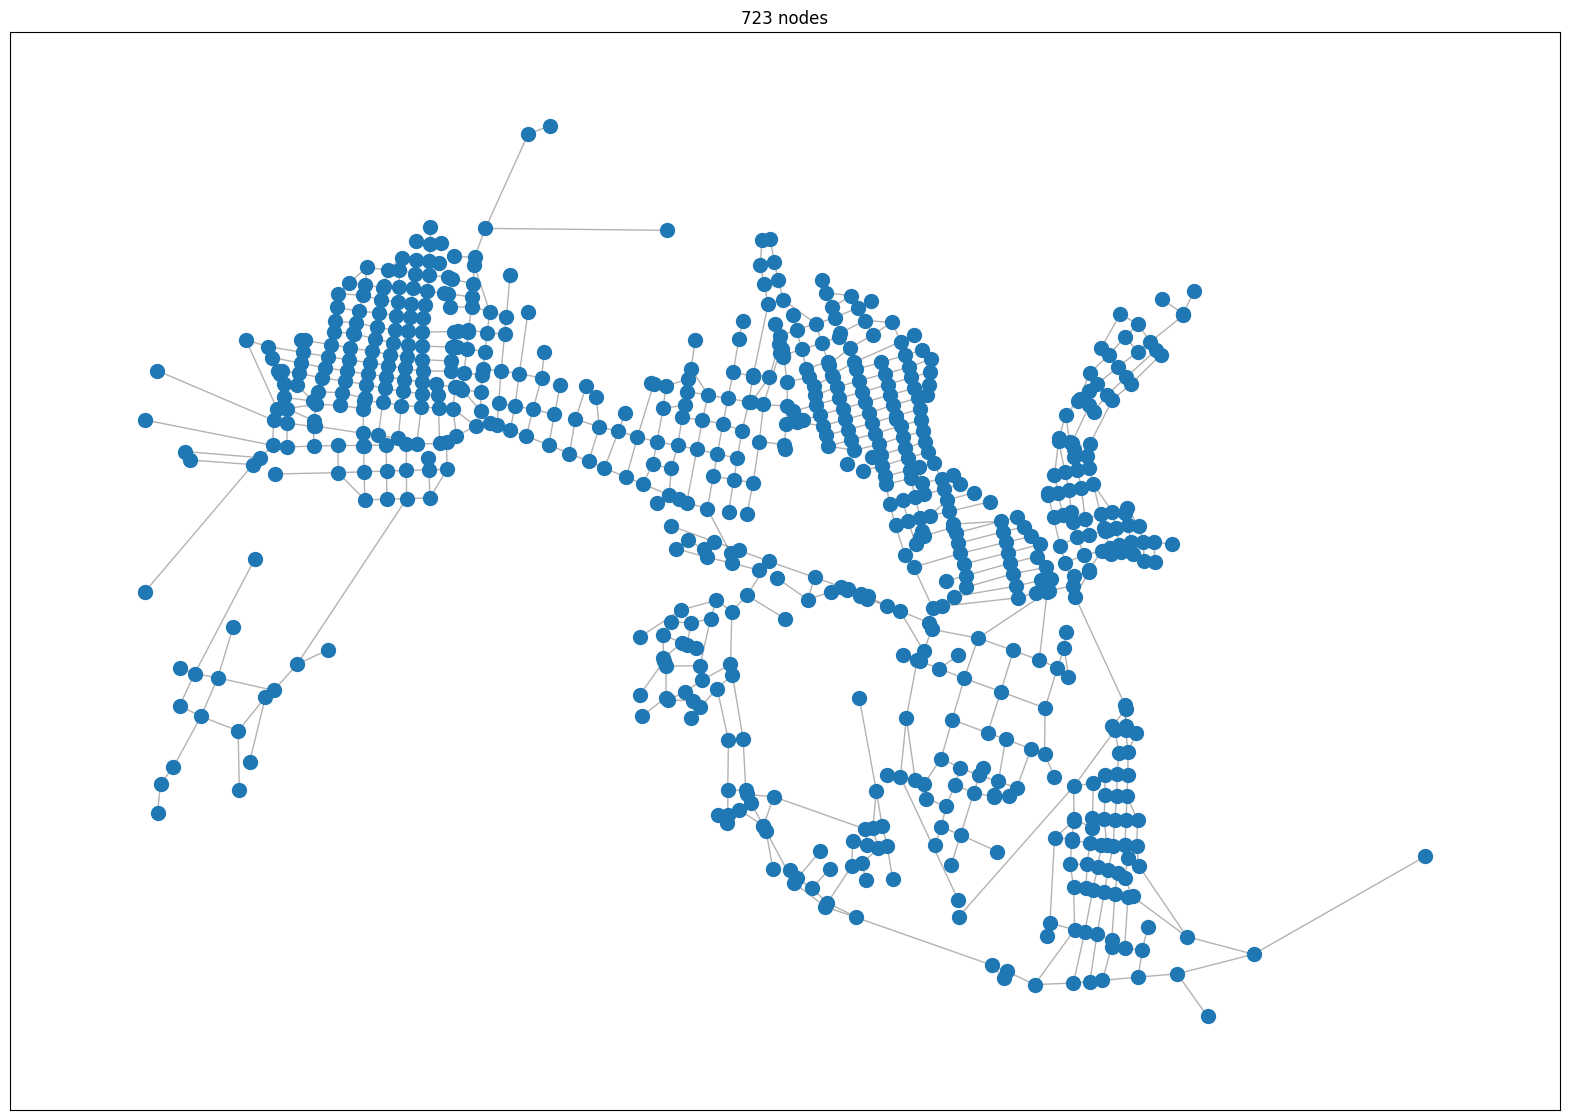

In [3]:
CITY = 'ASHA'
GRAPH_ID = graph_osm_loader.cities[CITY] # KRG

# примеры id есть в graph_osm_loader.py
G = graph_osm_loader.get_graph(GRAPH_ID) # загрузка графа

pos = {u: [d['x'], d['y']] for u,d in G.nodes(data=True)} 

A = nx.adjacency_matrix(G, weight='length').todense()


K = [
        list(G.nodes), # dim = 0 : vertices
        list(G.edges), # dim = 1 : edges
    ]

plt.figure(figsize=(20, 14))
nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title(f'{len(G.nodes)} nodes')

In [4]:
from sklearn.metrics import silhouette_score
from networkx.classes.function import path_weight


d_dict = dict(nx.all_pairs_dijkstra_path_length(G, weight='length'))
d_matrix = np.zeros((len(G.nodes), len(G.nodes)))
id_to_order = {id : order for order, id in enumerate(G.nodes)}

for row in d_dict:
    for v in d_dict[row]:
        d_matrix[id_to_order[row]][id_to_order[v]] = d_dict[row][v]

# def silhouette(d_matrix, clusters):
#     labels = np.zeros(len(id_to_order), dtype=int)

#     for i, cluster in enumerate(clusters):
#         for v in cluster:
#             labels[id_to_order[v]] = i
    
#     return silhouette_score(d_matrix, labels, metric='precomputed')

## Louvain

In [5]:
communities = nx.community.louvain_communities(G, weight='length')
score = nx.community.modularity(G, communities, weight='length')
print(f'Modularity: {score}')

Modularity: 0.9211878812838247


In [6]:
def plot_communities(communities):
    plt.figure(figsize=(20, 14))

    nx.draw_networkx_edges(G, pos, alpha=0.3)

    for j, cluster in enumerate(communities):
        color = '#%06X' % randint(0, 0xFFFFFF)
        for v in cluster:
            point = pos[v]
            plt.scatter(point[0], point[1], c=color)

    plt.title(f'{len(communities)} clusters | {score:.4f} modularity')

## Leiden

Modularity: 0.9225241891015902


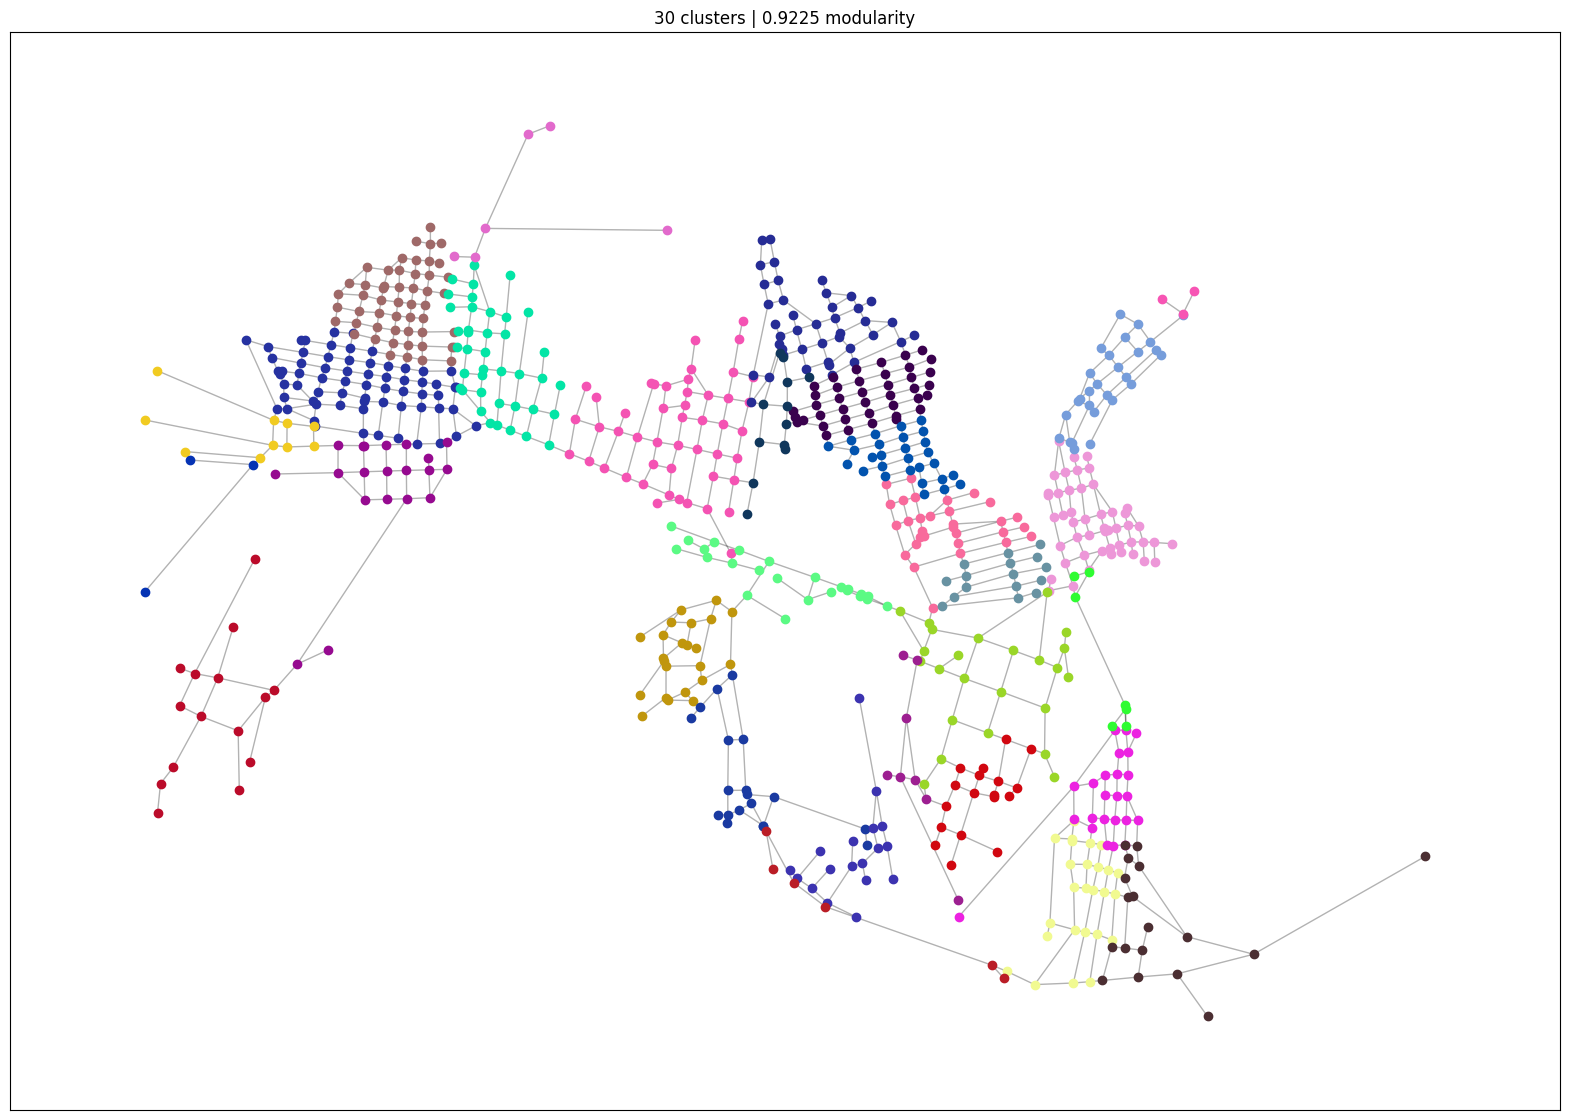

In [7]:
import leidenalg as la

seed = 0

communities = clustering.leiden(G, partition_type=la.ModularityVertexPartition, seed=seed, weights='length')
score = nx.community.modularity(G, communities, weight='length')
print(f'Modularity: {score}')

plot_communities(communities)

## Filtration

Performing Filtration Clustering


100%|██████████| 100/100 [00:02<00:00, 38.74it/s]


Finding best clustering


100%|██████████| 100/100 [00:00<00:00, 488.71it/s]


Best threshold 93.5548 with score: 0.8215216802457236
k = 7 | Modularity: 0.8215216802457237


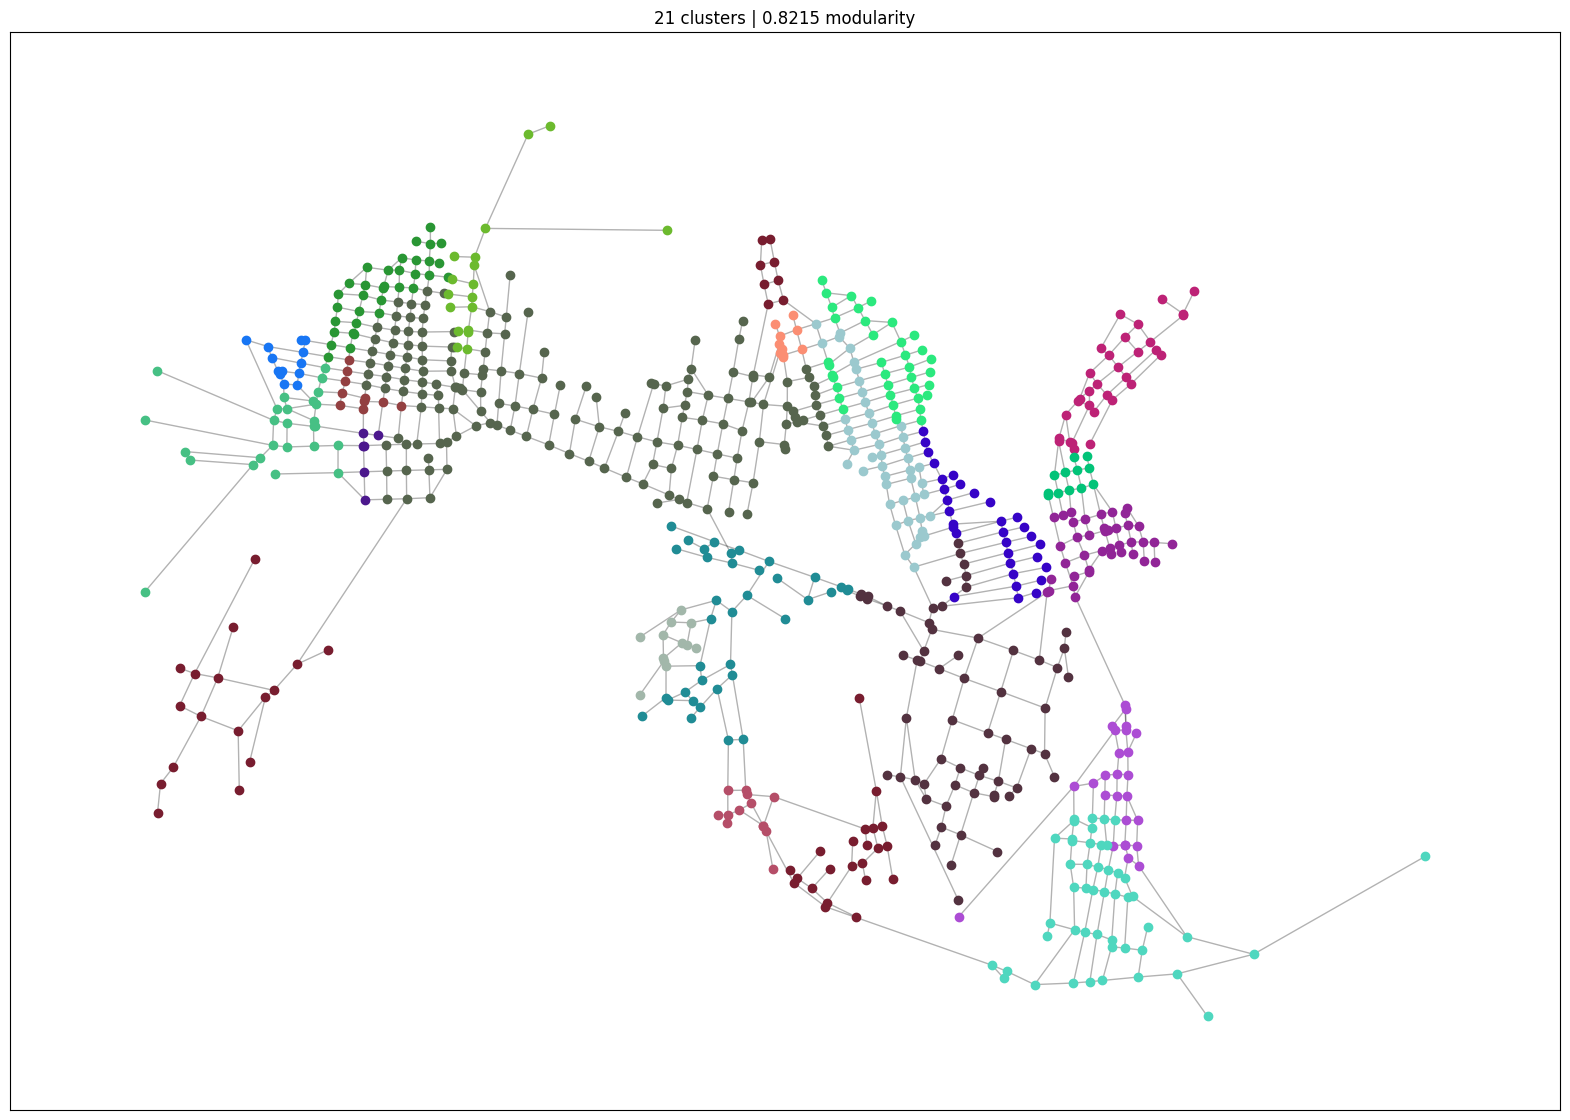

In [8]:
np.random.seed(0)

k = 7
G_knn = build_knn_graph(G, k=k, weight='length')
fc = FiltrationClustering(G_knn)

communities = fc.cluster(n_jobs=7)

score = nx.community.modularity(G_knn, communities, weight='length')
print(f'k = {k} | Modularity: {score}')

plot_communities(communities)

Performing Filtration Clustering


100%|██████████| 100/100 [00:00<00:00, 133.66it/s]


Finding best clustering


100%|██████████| 100/100 [00:00<00:00, 400.23it/s]


Best threshold 311.3742 with score: 0.7496106070673495
k = 10 | Modularity: 0.7496106070673497


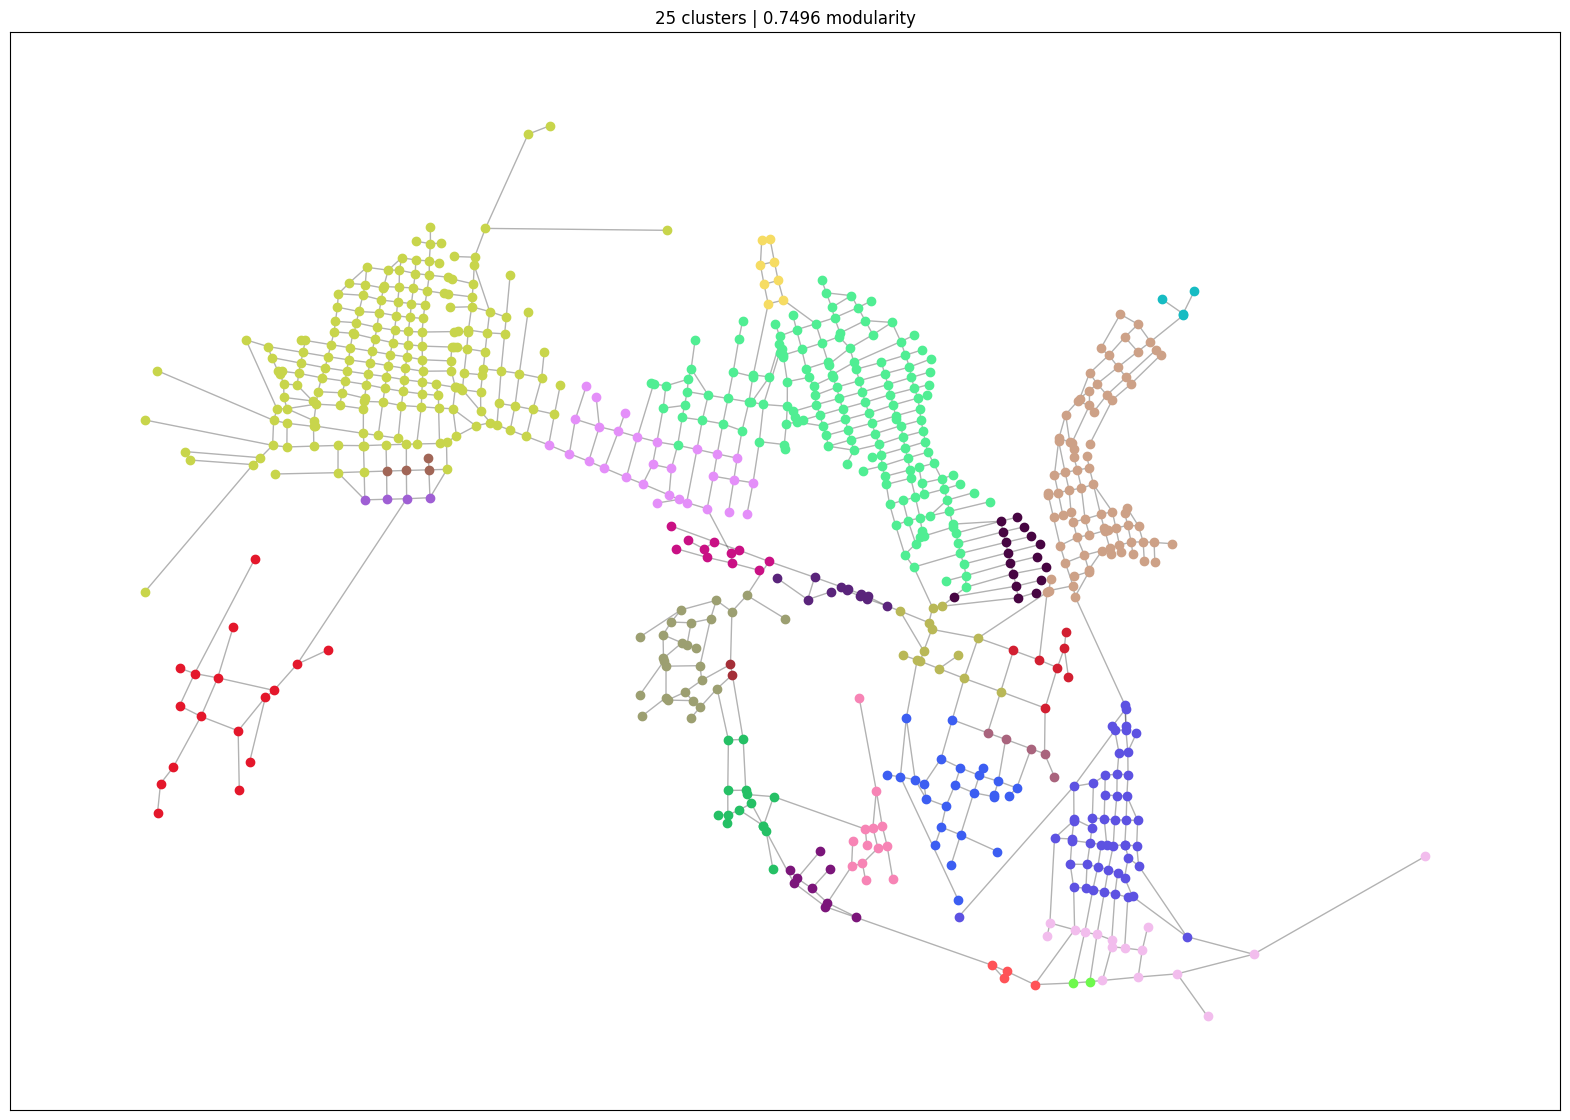

In [9]:
np.random.seed(0)

k = 10
G_knn = build_knn_graph(G, k=k, weight='length')
fc = FiltrationClustering(G_knn)

communities = fc.cluster(n_jobs=7)

score = nx.community.modularity(G_knn, communities, weight='length')
print(f'k = {k} | Modularity: {score}')

plot_communities(communities)

Performing Filtration Clustering


100%|██████████| 100/100 [00:00<00:00, 121.57it/s]


Finding best clustering


100%|██████████| 100/100 [00:00<00:00, 302.90it/s]


Best threshold 307.9558 with score: 0.6729030142279065
k = 15 | Modularity: 0.672903014227906


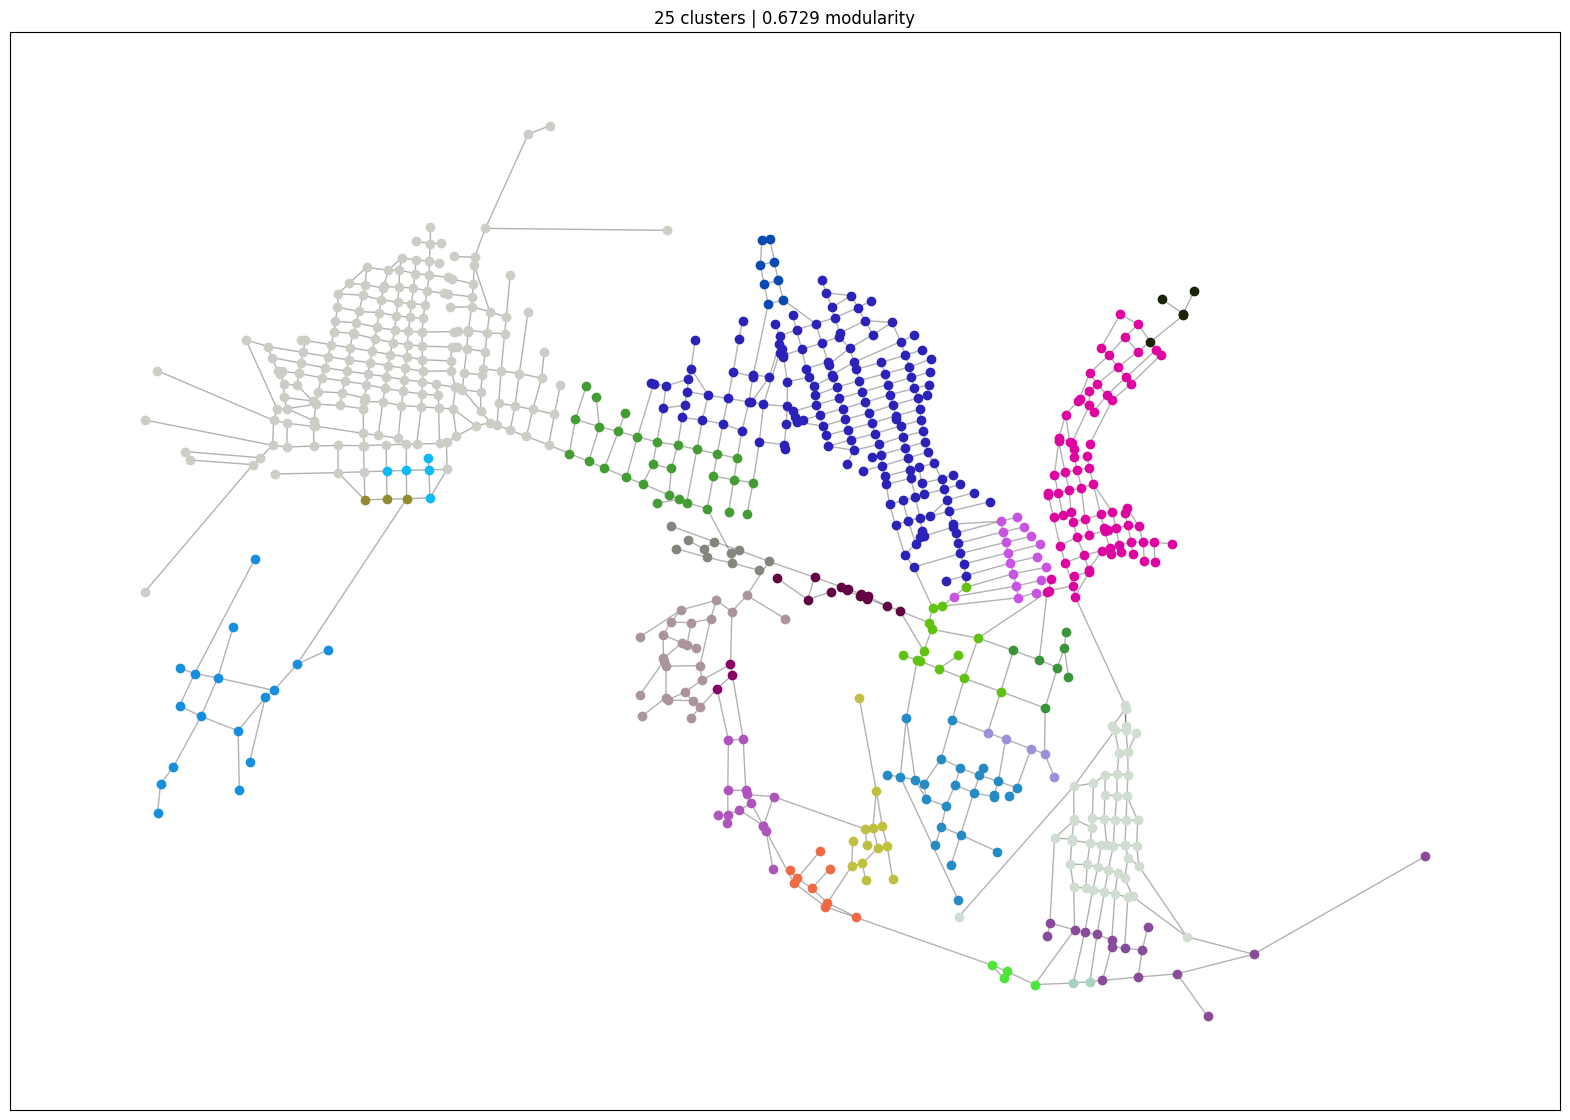

In [10]:
np.random.seed(0)

k = 15
G_knn = build_knn_graph(G, k=k, weight='length')
fc = FiltrationClustering(G_knn)

communities = fc.cluster(n_jobs=7)

score = nx.community.modularity(G_knn, communities, weight='length')
print(f'k = {k} | Modularity: {score}')

plot_communities(communities)

# KRG

Text(0.5, 1.0, '3345 nodes')

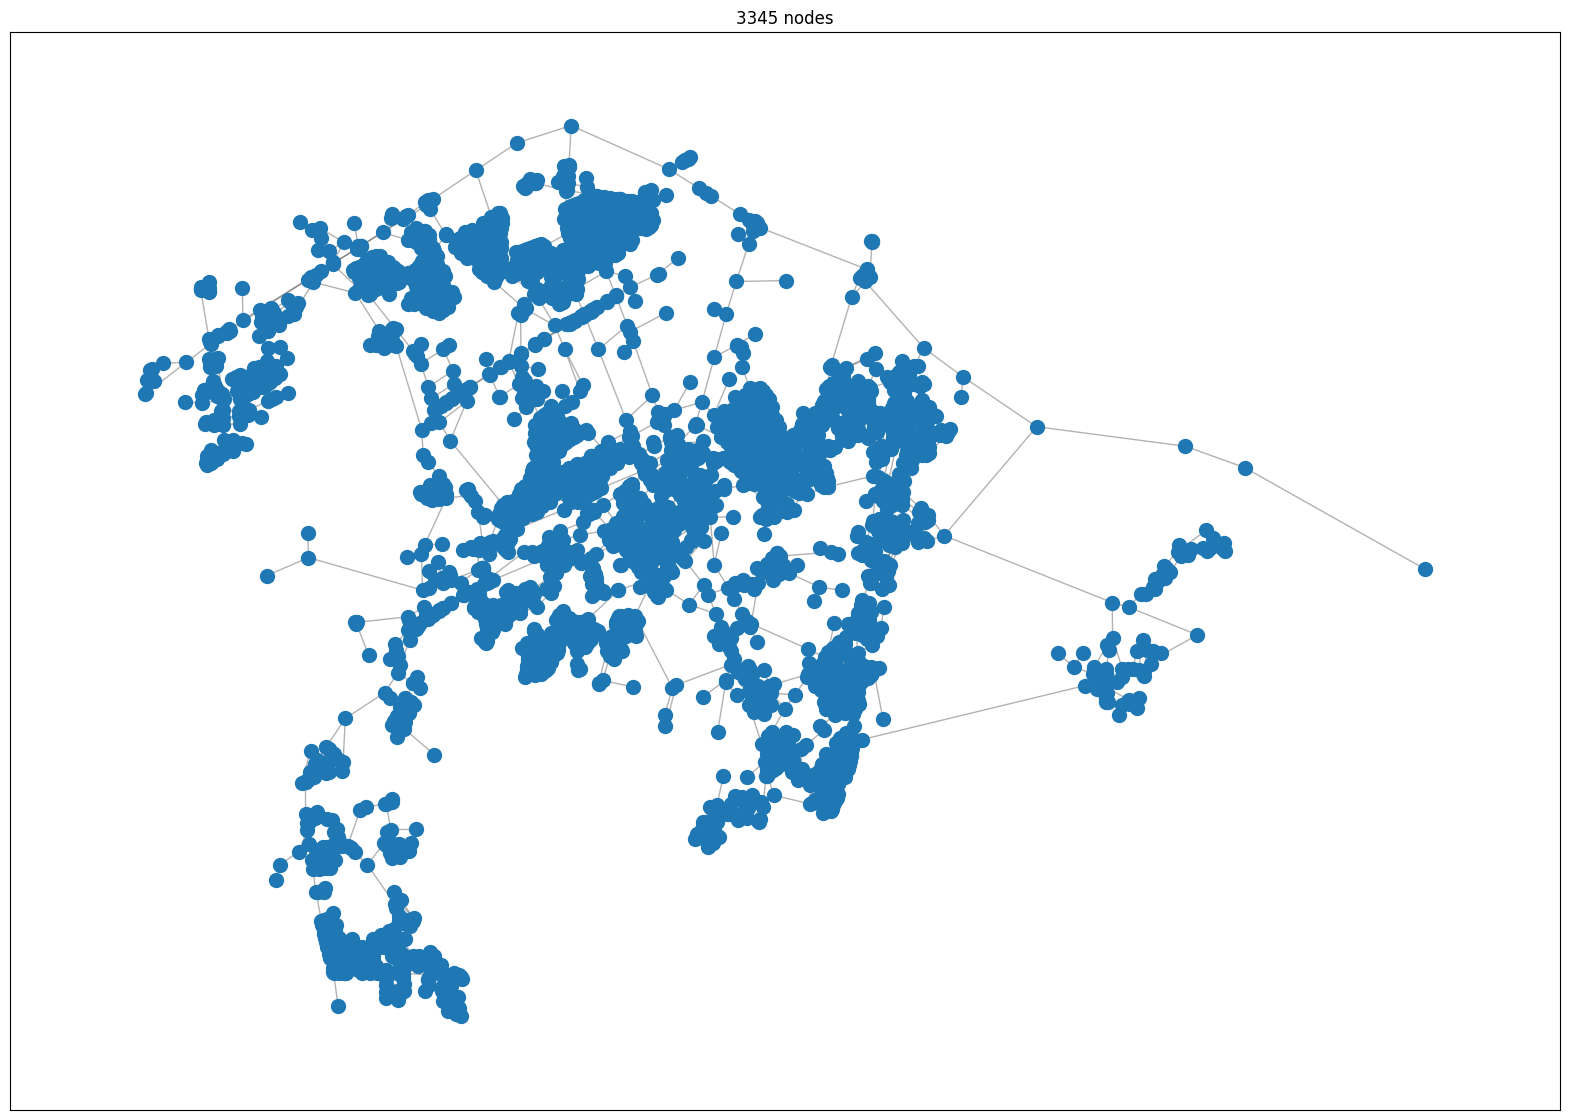

In [11]:
CITY = 'KRG'
GRAPH_ID = graph_osm_loader.cities[CITY] # KRG

# примеры id есть в graph_osm_loader.py
G = graph_osm_loader.get_graph(GRAPH_ID) # загрузка графа

pos = {u: [d['x'], d['y']] for u,d in G.nodes(data=True)} 

A = nx.adjacency_matrix(G, weight='length').todense()


K = [
        list(G.nodes), # dim = 0 : vertices
        list(G.edges), # dim = 1 : edges
    ]

plt.figure(figsize=(20, 14))
nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title(f'{len(G.nodes)} nodes')

In [12]:
d_dict = dict(nx.all_pairs_dijkstra_path_length(G, weight='length'))
d_matrix = np.zeros((len(G.nodes), len(G.nodes)))
id_to_order = {id : order for order, id in enumerate(G.nodes)}

for row in d_dict:
    for v in d_dict[row]:
        d_matrix[id_to_order[row]][id_to_order[v]] = d_dict[row][v]

In [13]:
def plot_communities(communities):
    plt.figure(figsize=(20, 14))

    nx.draw_networkx_edges(G, pos, alpha=0.3)

    for j, cluster in enumerate(communities):
        color = '#%06X' % randint(0, 0xFFFFFF)
        for v in cluster:
            point = pos[v]
            plt.scatter(point[0], point[1], c=color)

    plt.title(f'{len(communities)} clusters | {score:.4f} modularity')

## Louvain

In [14]:
communities = nx.community.louvain_communities(G, weight='length')
score = nx.community.modularity(G, communities, weight='length')
print(f'Modularity: {score}')

Modularity: 0.9654813133826076


## Leiden

Modularity: 0.9661229963629282


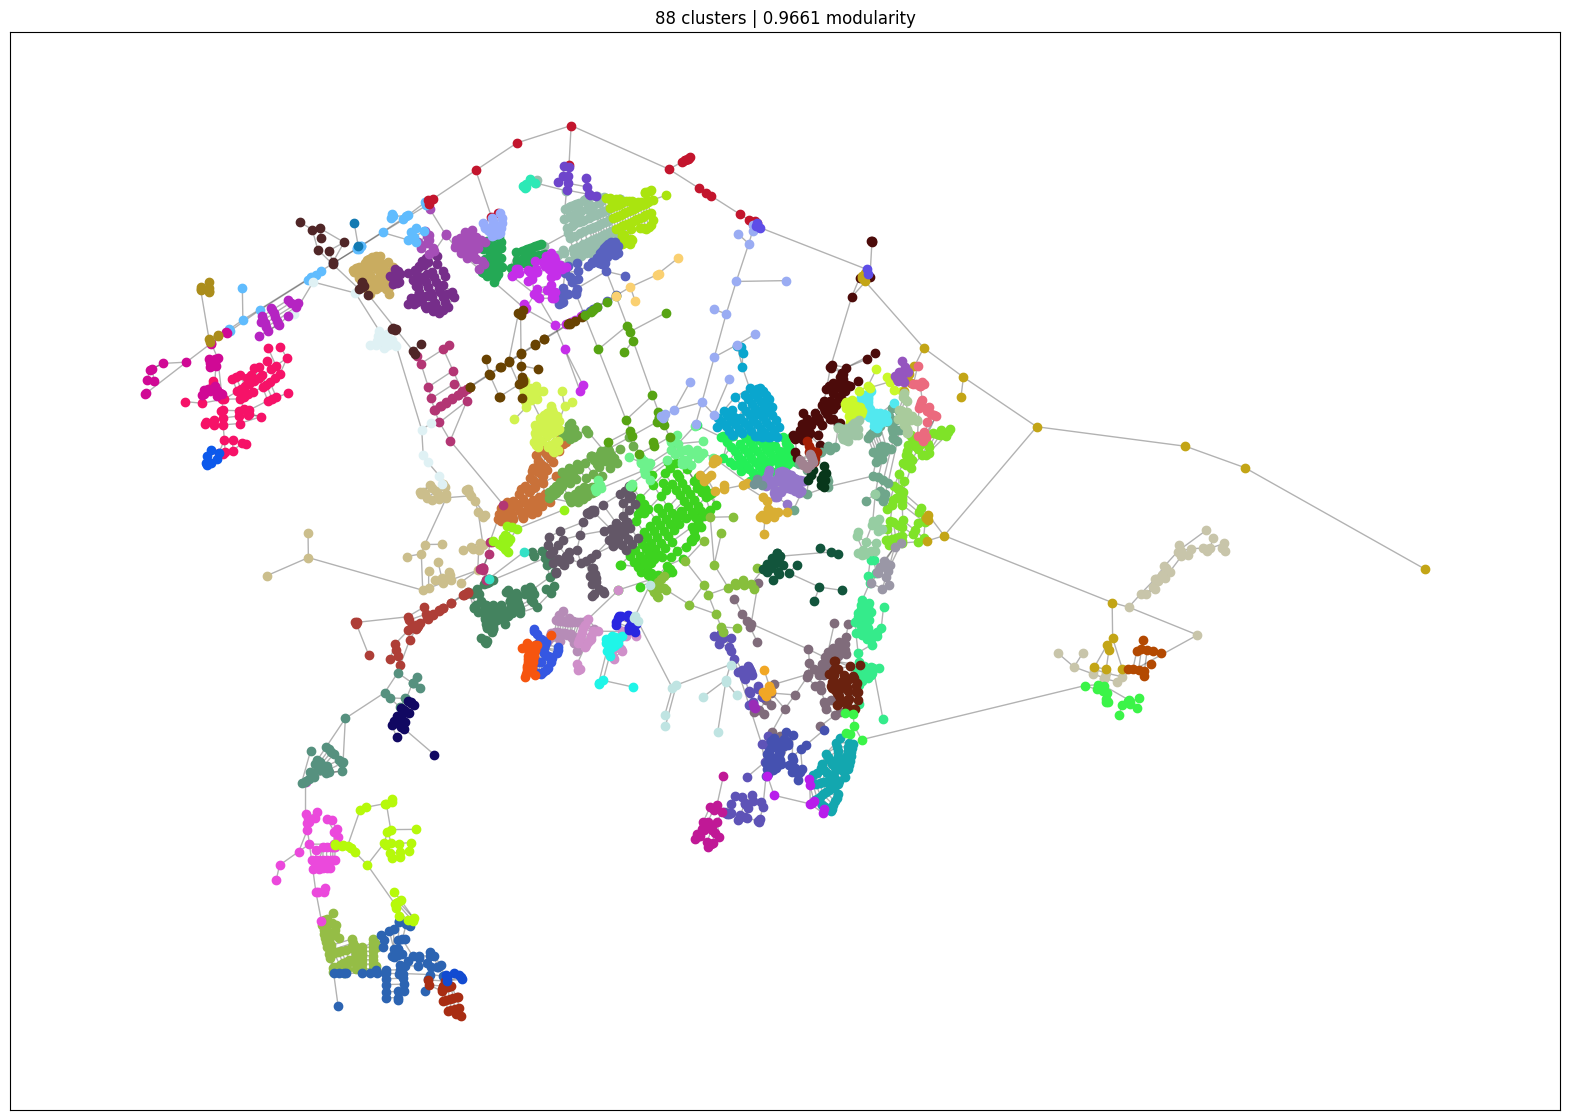

In [15]:
import leidenalg as la

seed = 0

communities = clustering.leiden(G, partition_type=la.ModularityVertexPartition, seed=seed, weights='length')
score = nx.community.modularity(G, communities, weight='length')
print(f'Modularity: {score}')

plot_communities(communities)

## Filtration

Performing Filtration Clustering


100%|██████████| 100/100 [00:13<00:00,  7.64it/s]


Finding best clustering


100%|██████████| 100/100 [00:01<00:00, 94.88it/s]


Best threshold 14329.8026 with score: 0.9419634429631492
k = 7 | Modularity: 0.9419634429631492


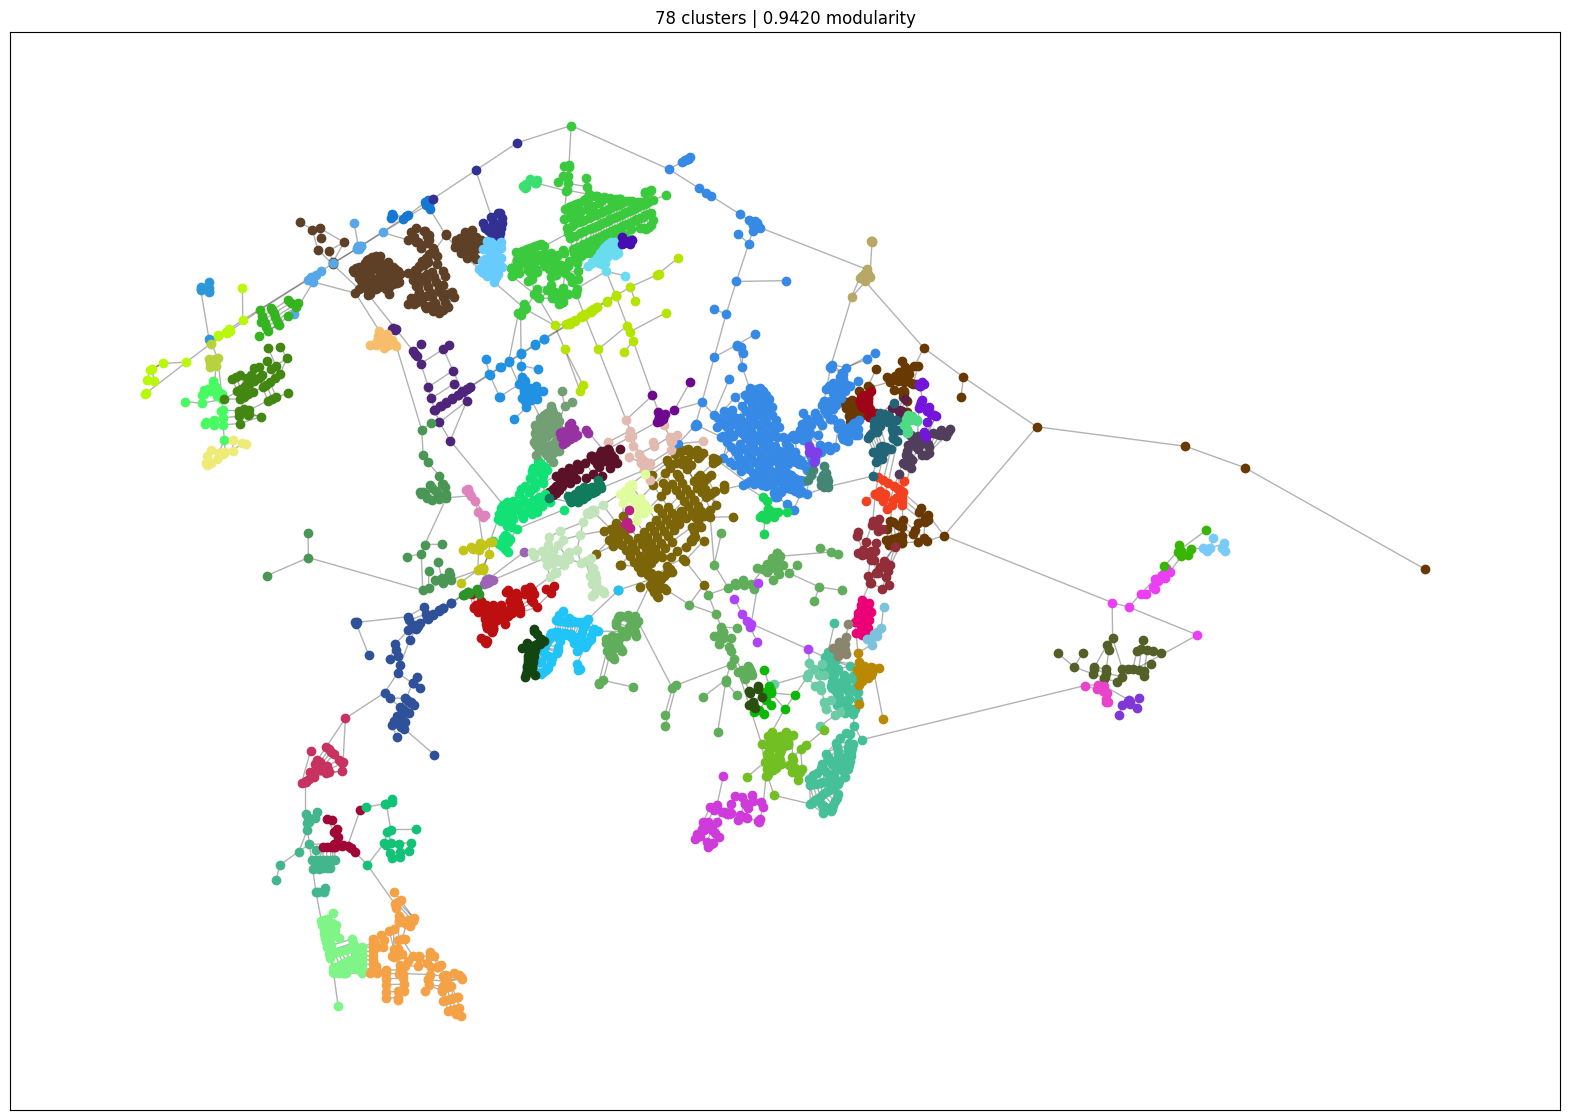

In [16]:
np.random.seed(0)

k = 7
G_knn = build_knn_graph(G, k=k, weight='length')
fc = FiltrationClustering(G_knn)

communities = fc.cluster(n_jobs=7)

score = nx.community.modularity(G_knn, communities, weight='length')
print(f'k = {k} | Modularity: {score}')

plot_communities(communities)

Performing Filtration Clustering


100%|██████████| 100/100 [00:10<00:00,  9.42it/s]


Finding best clustering


100%|██████████| 100/100 [00:01<00:00, 79.29it/s]


Best threshold 14898.1372 with score: 0.8740844979836299
k = 10 | Modularity: 0.8740844979836297


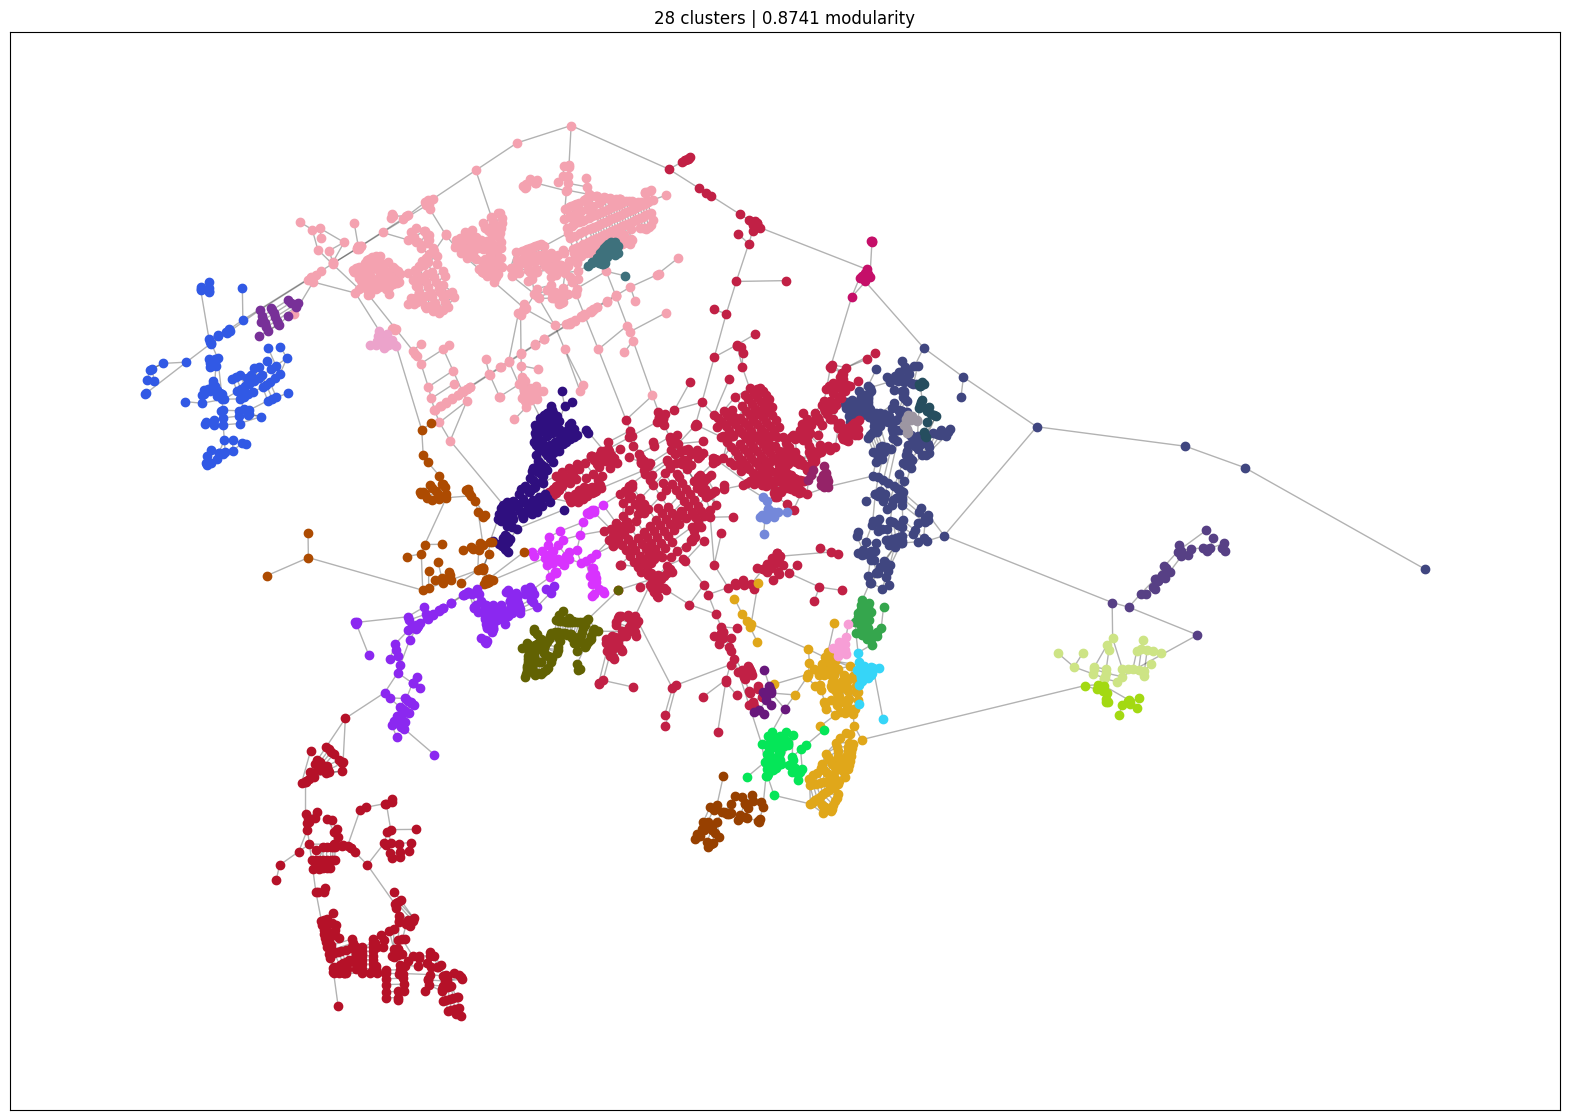

In [17]:
np.random.seed(0)

k = 10
G_knn = build_knn_graph(G, k=k, weight='length')
fc = FiltrationClustering(G_knn)

communities = fc.cluster(n_jobs=7)

score = nx.community.modularity(G_knn, communities, weight='length')
print(f'k = {k} | Modularity: {score}')

plot_communities(communities)

Performing Filtration Clustering


100%|██████████| 100/100 [00:09<00:00, 10.42it/s]


Finding best clustering


100%|██████████| 100/100 [00:01<00:00, 59.36it/s]


Best threshold 2082.0997 with score: 0.8435735584040422
k = 15 | Modularity: 0.8435735584040422


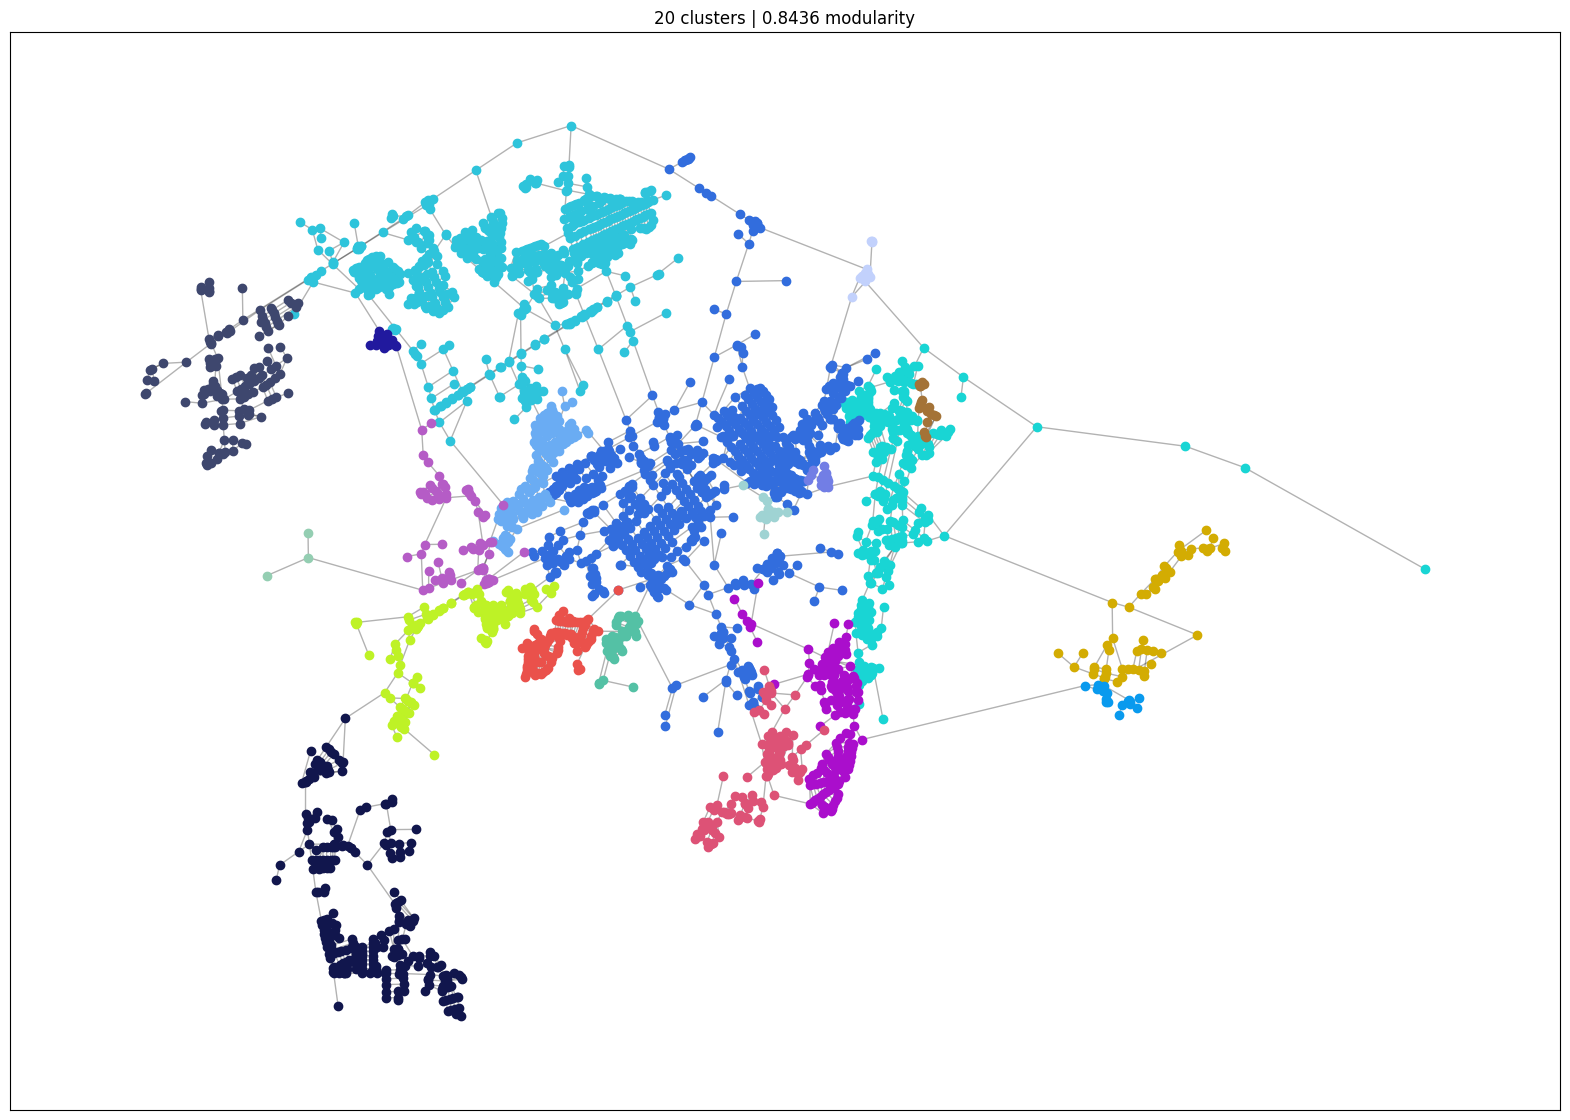

In [18]:
np.random.seed(0)

k = 15
G_knn = build_knn_graph(G, k=k, weight='length')
fc = FiltrationClustering(G_knn)

communities = fc.cluster(n_jobs=7)

score = nx.community.modularity(G_knn, communities, weight='length')
print(f'k = {k} | Modularity: {score}')

plot_communities(communities)

# EKB

Text(0.5, 1.0, '5608 nodes')

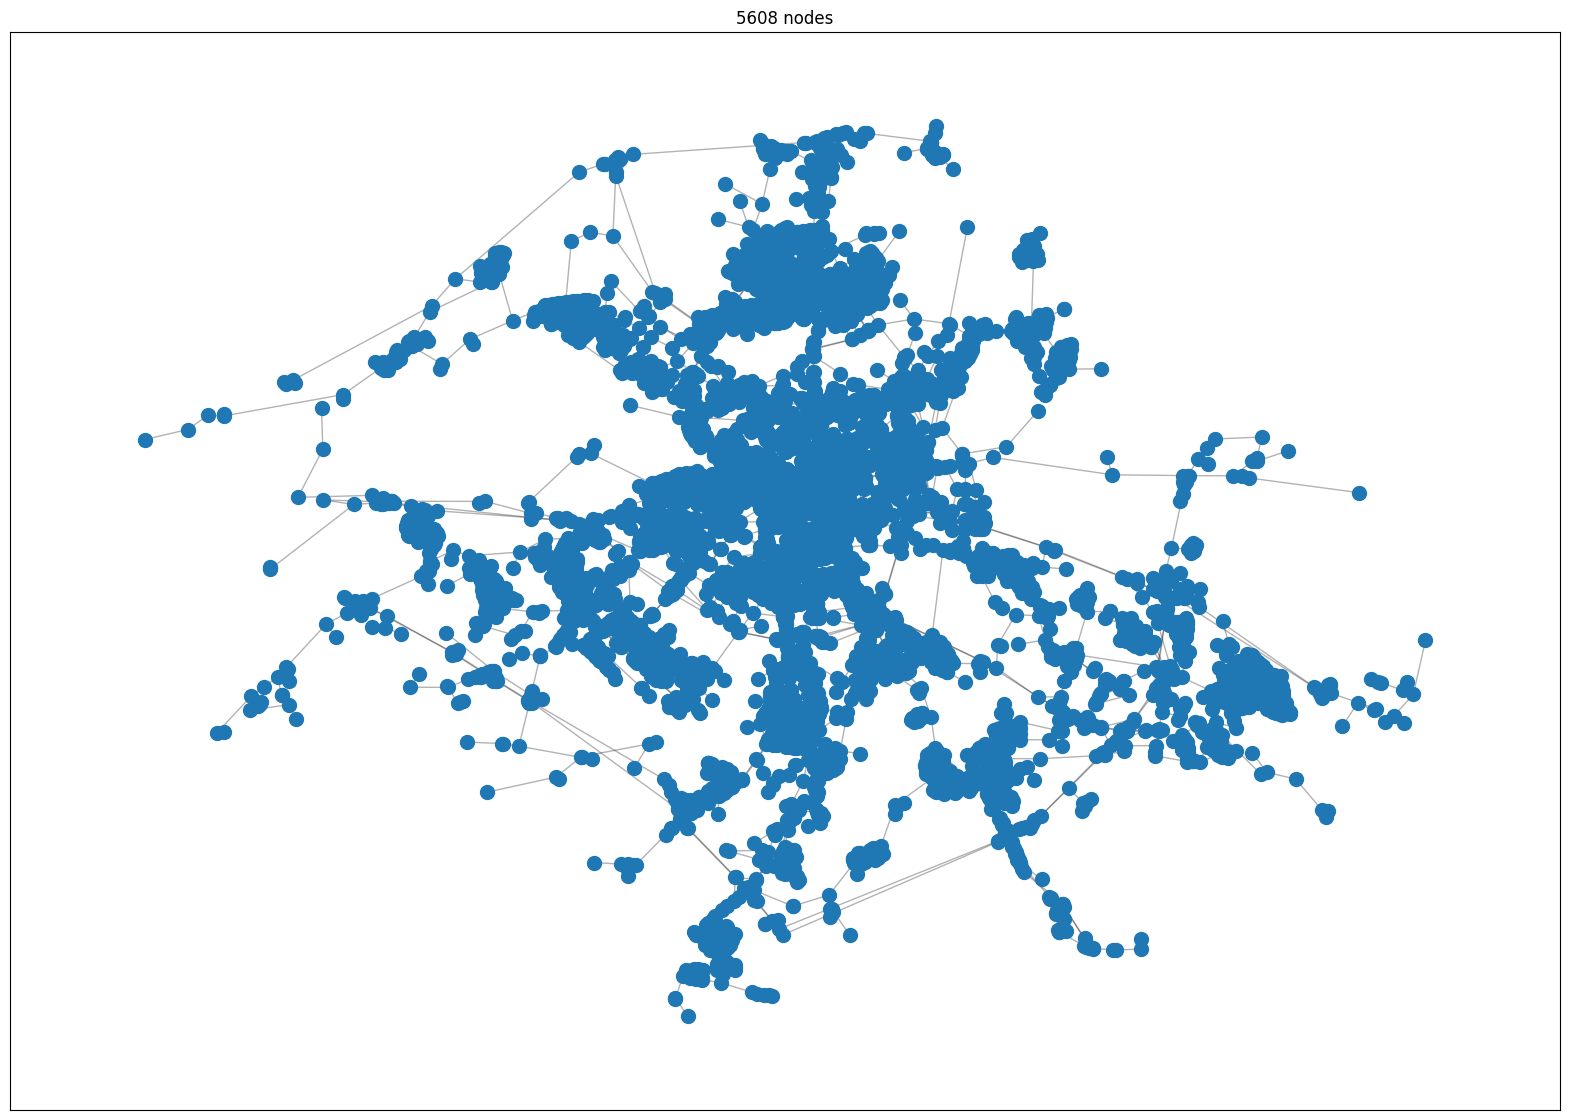

In [19]:
CITY = 'EKB'
GRAPH_ID = graph_osm_loader.cities[CITY] # KRG

# примеры id есть в graph_osm_loader.py
G = graph_osm_loader.get_graph(GRAPH_ID) # загрузка графа

pos = {u: [d['x'], d['y']] for u,d in G.nodes(data=True)} 

A = nx.adjacency_matrix(G, weight='length').todense()


K = [
        list(G.nodes), # dim = 0 : vertices
        list(G.edges), # dim = 1 : edges
    ]

plt.figure(figsize=(20, 14))
nx.draw_networkx_nodes(G, pos, node_size=100)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title(f'{len(G.nodes)} nodes')

In [20]:
d_dict = dict(nx.all_pairs_dijkstra_path_length(G, weight='length'))
d_matrix = np.zeros((len(G.nodes), len(G.nodes)))
id_to_order = {id : order for order, id in enumerate(G.nodes)}

for row in d_dict:
    for v in d_dict[row]:
        d_matrix[id_to_order[row]][id_to_order[v]] = d_dict[row][v]

In [21]:
def plot_communities(communities):
    plt.figure(figsize=(20, 14))

    nx.draw_networkx_edges(G, pos, alpha=0.3)

    for j, cluster in enumerate(communities):
        color = '#%06X' % randint(0, 0xFFFFFF)
        for v in cluster:
            point = pos[v]
            plt.scatter(point[0], point[1], c=color)

    plt.title(f'{len(communities)} clusters | {score:.4f} modularity')

## Louvain

In [22]:
communities = nx.community.louvain_communities(G, weight='length')
score = nx.community.modularity(G, communities, weight='length')
print(f'Modularity: {score}')

Modularity: 0.9710296171904348


## Leiden

Modularity: 0.9714546068803567


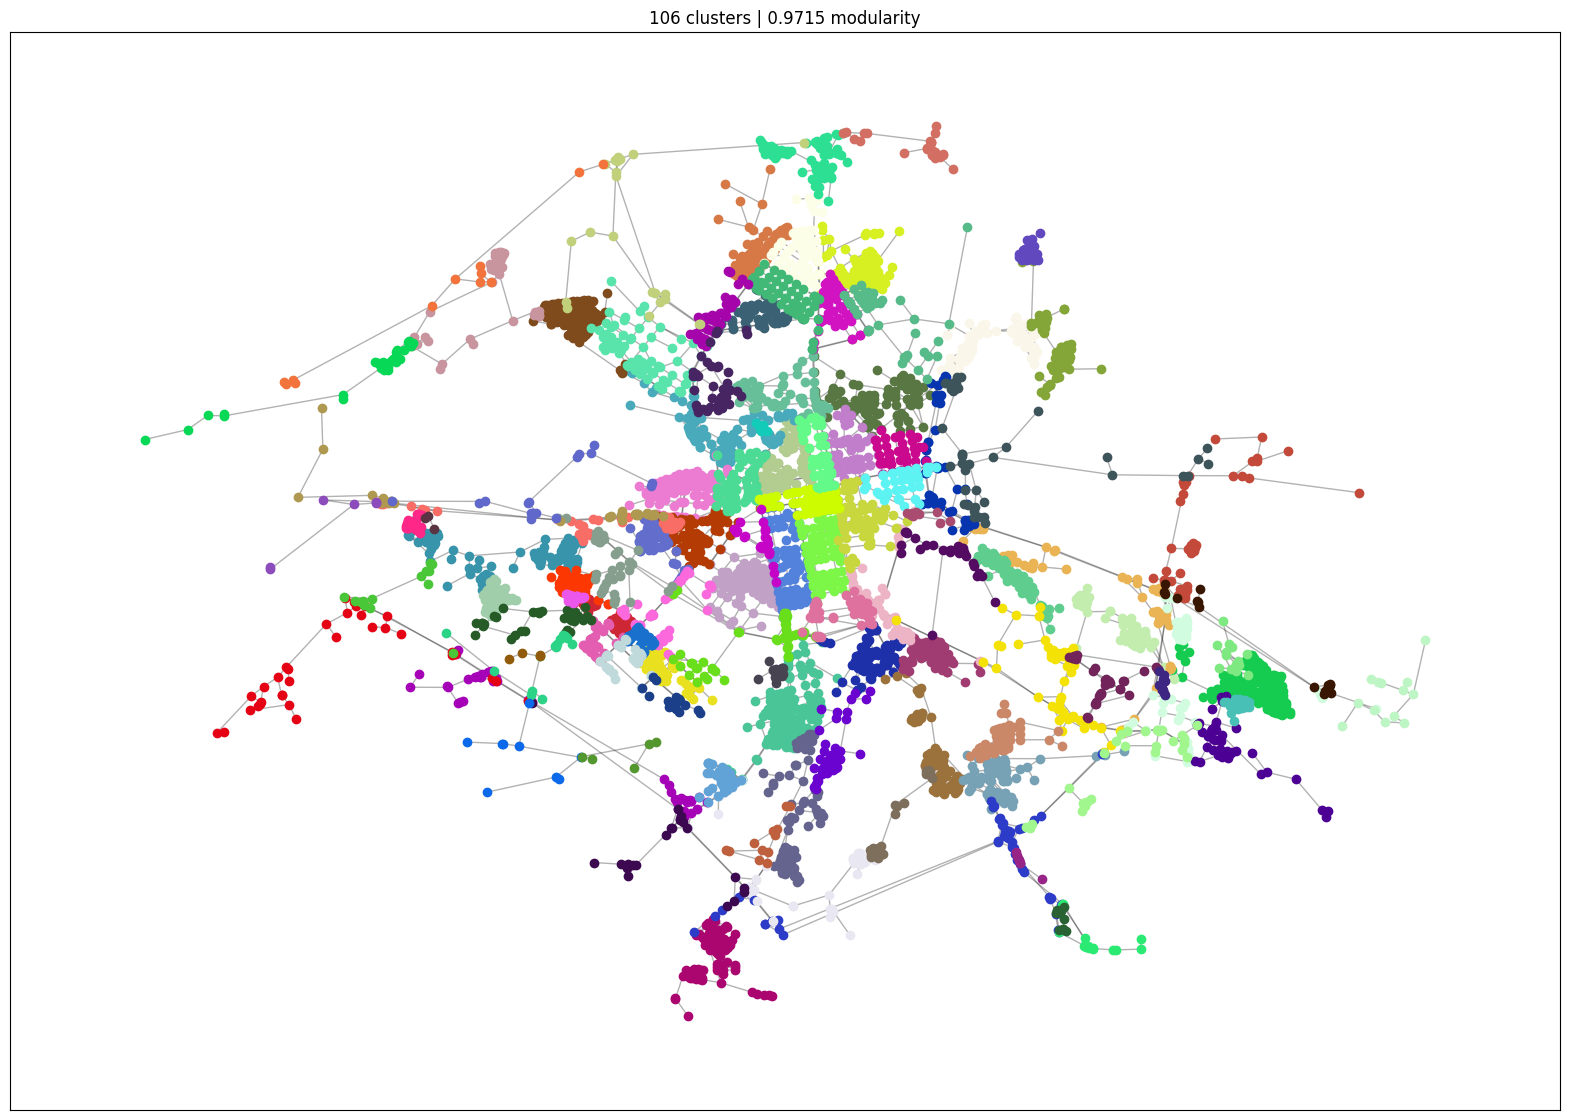

In [23]:
import leidenalg as la

seed = 0

communities = clustering.leiden(G, partition_type=la.ModularityVertexPartition, seed=seed, weights='length')
score = nx.community.modularity(G, communities, weight='length')
print(f'Modularity: {score}')

plot_communities(communities)

## Filtration

Performing Filtration Clustering


100%|██████████| 100/100 [00:32<00:00,  3.06it/s]


Finding best clustering


100%|██████████| 100/100 [00:01<00:00, 56.33it/s]


Best threshold 8167.6667 with score: 0.9369895066773061
k = 7 | Modularity: 0.9369895066773062


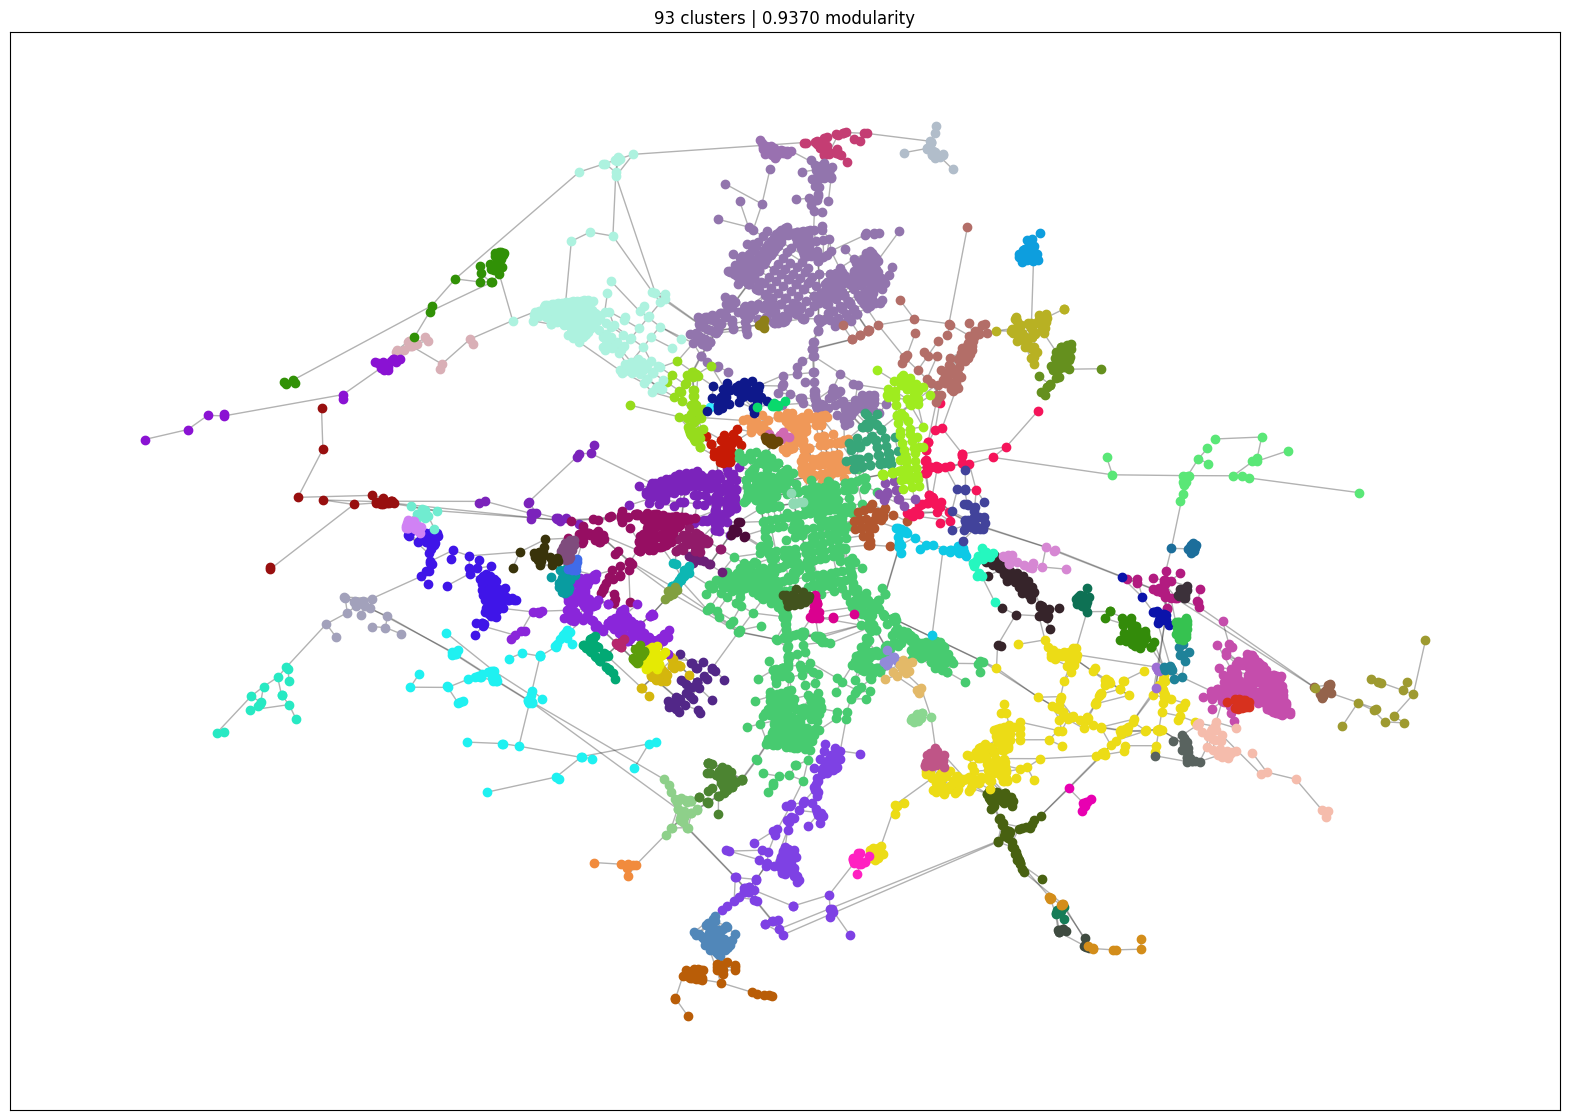

In [24]:
np.random.seed(0)

k = 7
G_knn = build_knn_graph(G, k=k, weight='length')
fc = FiltrationClustering(G_knn)

communities = fc.cluster(n_jobs=7)

score = nx.community.modularity(G_knn, communities, weight='length')
print(f'k = {k} | Modularity: {score}')

plot_communities(communities)

Performing Filtration Clustering


100%|██████████| 100/100 [00:27<00:00,  3.66it/s]


Finding best clustering


100%|██████████| 100/100 [00:02<00:00, 43.80it/s]


Best threshold 102.1779 with score: 0.7593614669106635
k = 10 | Modularity: 0.7593614669106633


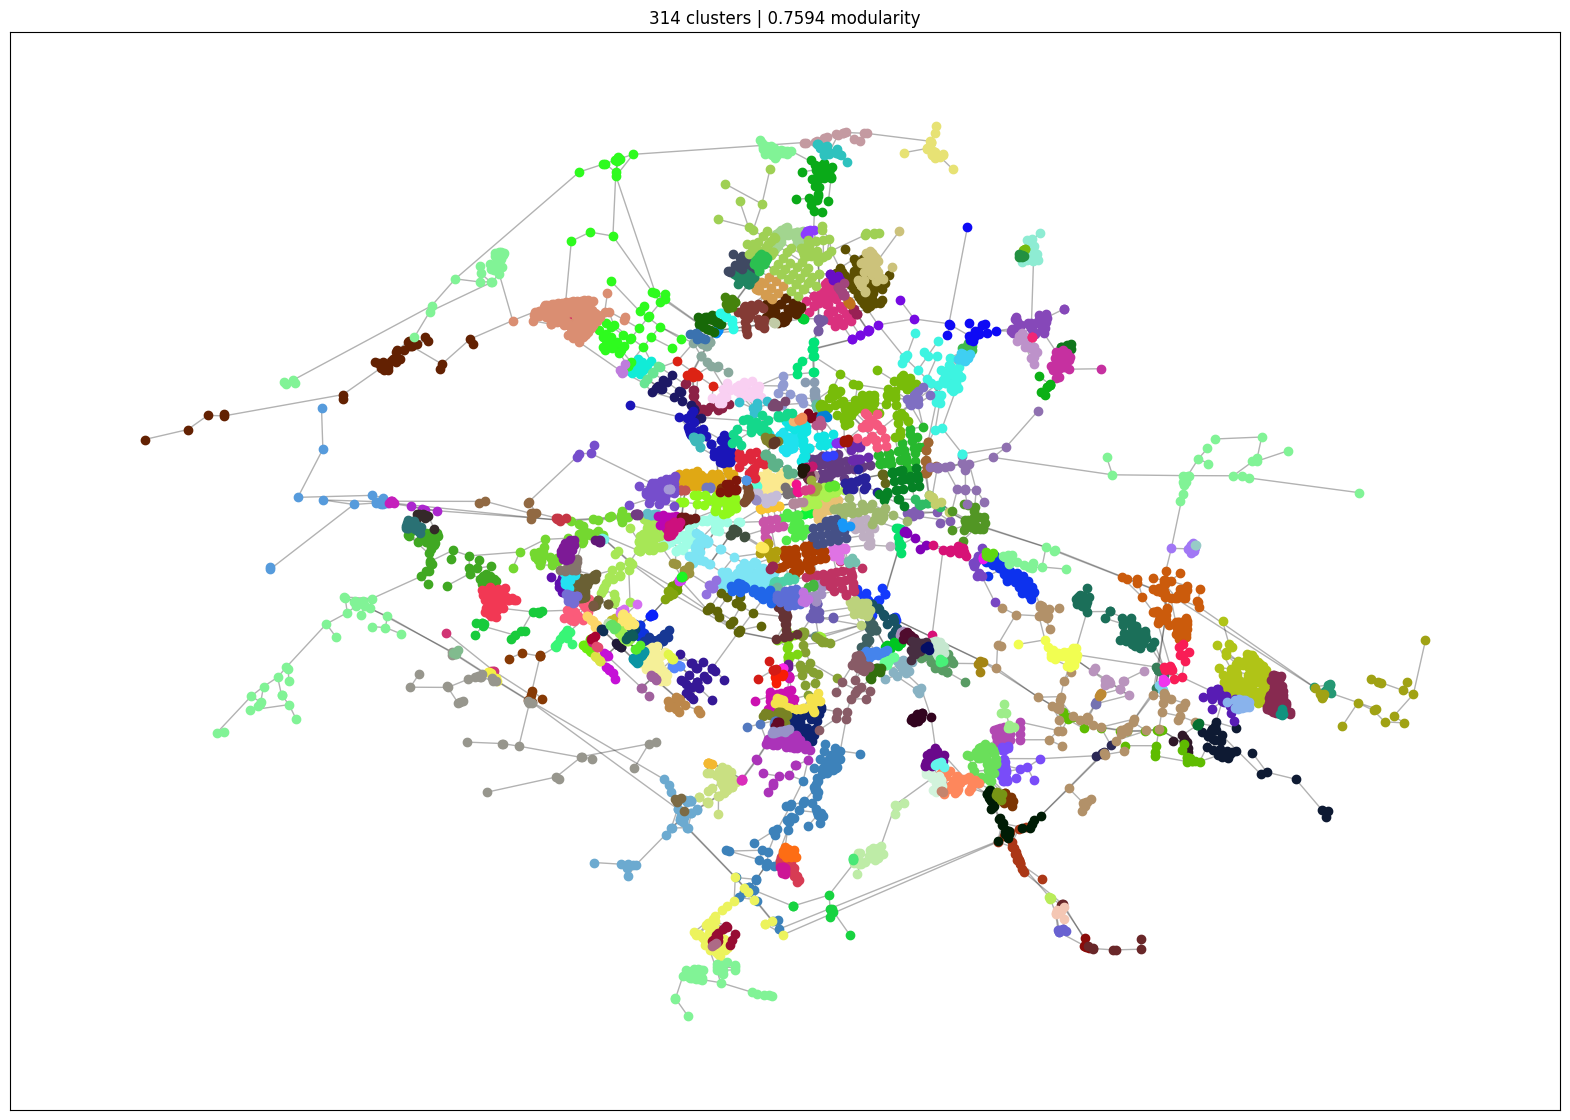

In [25]:
np.random.seed(0)

k = 10
G_knn = build_knn_graph(G, k=k, weight='length')
fc = FiltrationClustering(G_knn)

communities = fc.cluster(n_jobs=7)

score = nx.community.modularity(G_knn, communities, weight='length')
print(f'k = {k} | Modularity: {score}')

plot_communities(communities)

Performing Filtration Clustering


100%|██████████| 100/100 [00:22<00:00,  4.50it/s]


Finding best clustering


100%|██████████| 100/100 [00:03<00:00, 33.22it/s]


Best threshold 577.4532 with score: 0.6592060668576851
k = 15 | Modularity: 0.6592060668576851


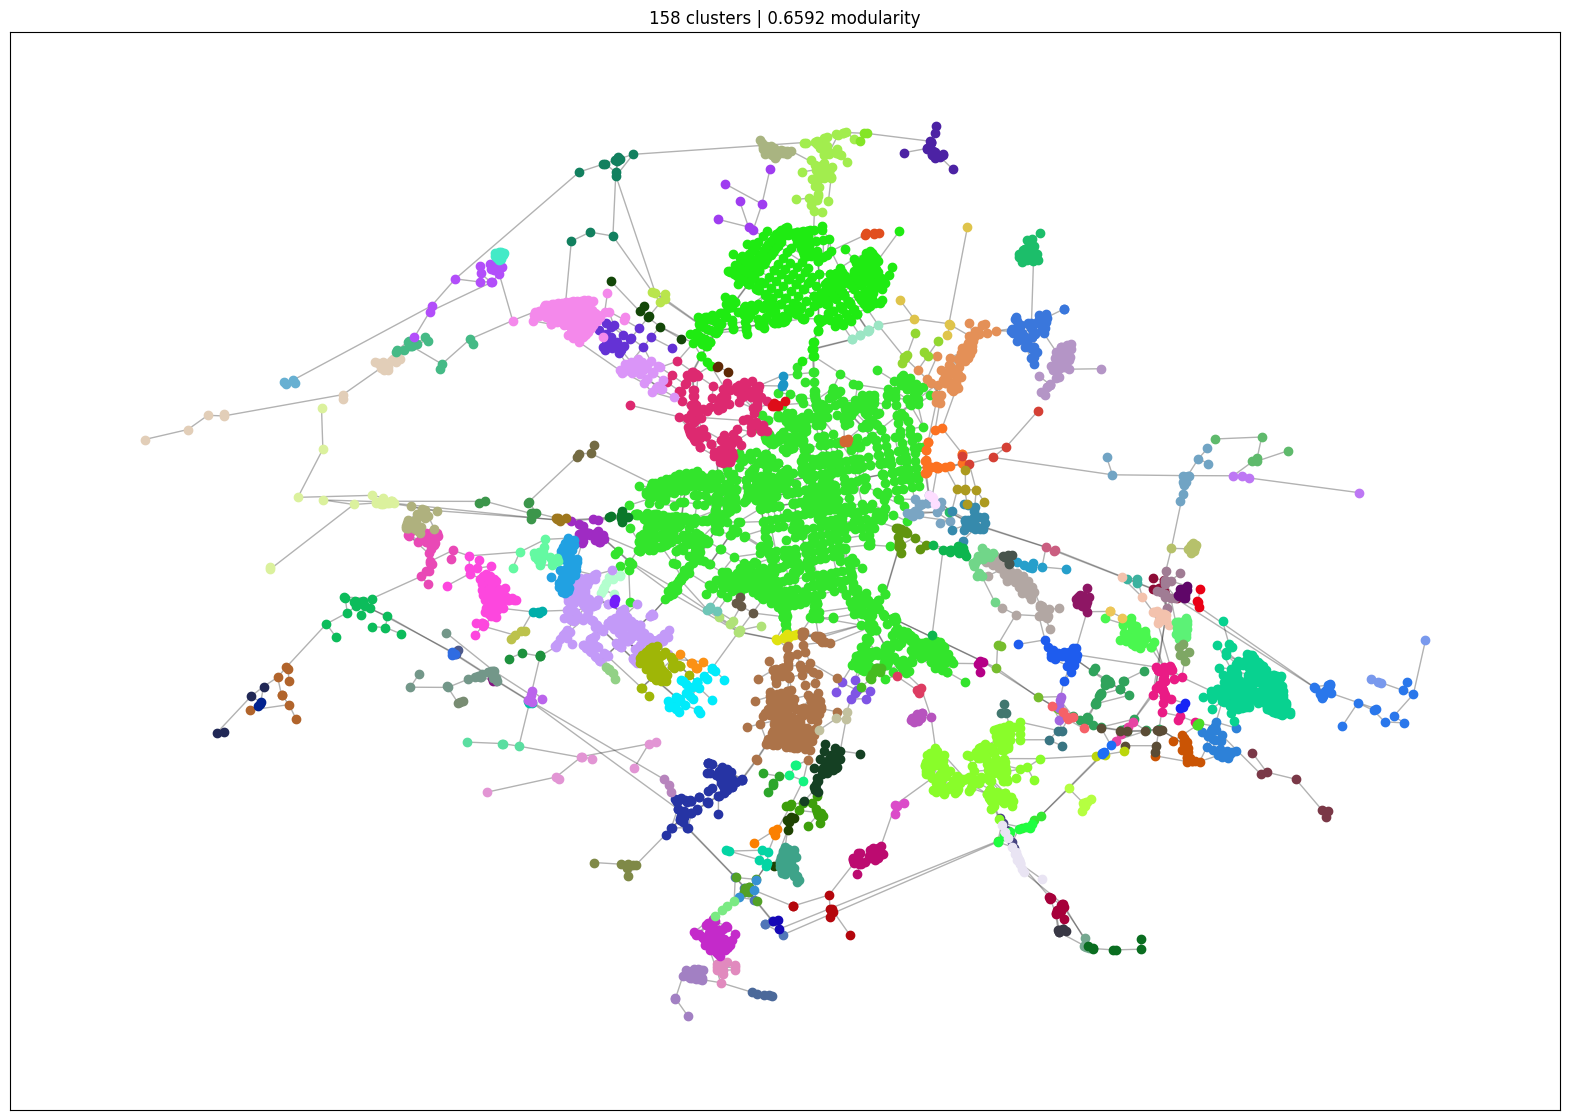

In [26]:
np.random.seed(0)

k = 15
G_knn = build_knn_graph(G, k=k, weight='length')
fc = FiltrationClustering(G_knn)

communities = fc.cluster(n_jobs=7)

score = nx.community.modularity(G_knn, communities, weight='length')
print(f'k = {k} | Modularity: {score}')

plot_communities(communities)